In [12]:
from __future__ import print_function

import numpy as np
import matplotlib.pyplot as plt
from skimage import io 

from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
%matplotlib notebook

In [13]:
# plt.imread reads tif as a single image instead of as a stack of images. Use io.imread instead.
# Read in the full stack of images or part of it
# im = io.imread('centering_myosin.tif')
imp = io.imread('centering_myosin_partial.tif')
imp.shape

(13, 150, 190)

<IPython.core.display.Javascript object>


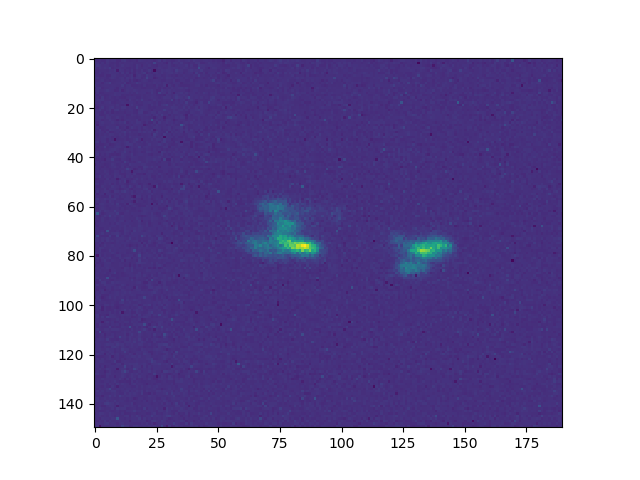

In [4]:
%matplotlib notebook
plt.imshow(imp[1])

In [14]:
def plot(time):
    plt.figure()
    plt.imshow(imp[time])
    ax = plt.gca();
    ax.set_xticks(np.arange(-.5, 180, 10), minor=True);
    ax.set_yticks(np.arange(-.5, 150, 10), minor=True);
    ax.grid(which='minor', color='w', linestyle='-', linewidth=1)

In [15]:
interact(plot, time = widgets.IntSlider(value=0, min=0, max=12, step=1))

interactive(children=(IntSlider(value=0, description='time', max=12), Output()), _dom_classes=('widget-interac…

<function __main__.plot(time)>

TypeError: cannot unpack non-iterable AxesImage object

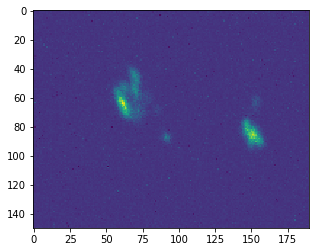

In [16]:
# This and later cells are e

def onclick(event):
    print(event.xdata, event.ydata)

fig,ax = plt.imshow(im[0])
ax.plot(range(10))
fig.canvas.mpl_connect('button_press_event', onclick)
fig.show()

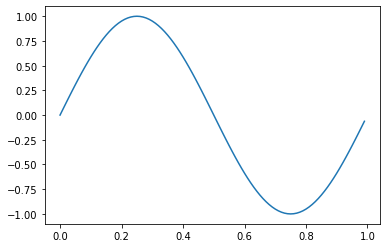

In [17]:
from matplotlib.backend_bases import MouseButton
import matplotlib.pyplot as plt
import numpy as np

t = np.arange(0.0, 1.0, 0.01)
s = np.sin(2 * np.pi * t)
fig, ax = plt.subplots()
ax.plot(t, s)


def on_move(event):
    # get the x and y pixel coords
    x, y = event.x, event.y
    if event.inaxes:
        ax = event.inaxes  # the axes instance
        print('data coords %f %f' % (event.xdata, event.ydata))


def on_click(event):
    if event.button is MouseButton.LEFT:
        print('disconnecting callback')
        plt.disconnect(binding_id)


binding_id = plt.connect('motion_notify_event', on_move)
plt.connect('button_press_event', on_click)

plt.show()

In [18]:
!pip install -U -q ipywidgets
!jupyter nbextension enable --py widgetsnbextension

Enabling notebook extension jupyter-js-widgets/extension...
      - Validating: ok


In [24]:
%matplotlib tk
%matplotlib qt5
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

fig = plt.figure(figsize=(20,30))

img=mpimg.imread('centering_myosin_partial.tif')

def onclick(event):
    ix, iy = event.xdata, event.ydata
    print(ix, iy)

cid = fig.canvas.mpl_connect('button_press_event', onclick)

imgplot = plt.imshow(img)
plt.show()